# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

## Tipos do Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

# 2 - Esse exercício faremos por etapas:
## Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [4]:
df.isnull().sum()

customerID               0
Genero                  12
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       325
Total_Pago               0
Churn                    5
dtype: int64

In [5]:
df.isnull().mean() * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

## Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

### Análise e Tratamento de Nulo para a Coluna 'Gênero' e 'Churn'
De acordo com a porcentagem de dados nulos na base de dados, podemos verificar que as colunas de Gênero e Churn são as com menores perdas, caso essas linhas forem excluídas, e também é verificado que as linhas onde Churn é nulo, também contém Gênero nulo; além de conter diversos dados faltantes em 'Pagamento_Mensal' (outra coluna com muitos nulos), o que já ajudaria no tratamento dessa coluna. Dessa forma, excluindo somente as linhas onde Gênero é nulo, já teremos um tratamento para Churn e Pagamento_Mensal, a priori. 

In [6]:
df[df['Genero'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN
10,9763-GRSKD,NaN,0,Yes,Yes,13,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,NaN,587.45,No
11,7469-LKBCI,NaN,0,No,No,16,Yes,No,No internet service,No internet service,No internet service,Two year,Credit card (automatic),NaN,326.80,No
12,8091-TTVAX,NaN,0,Yes,No,58,Yes,Fiber optic,No,No,Yes,One year,Credit card (automatic),NaN,5681.10,No
13,0280-XJGEX,NaN,0,No,No,49,Yes,Fiber optic,No,No,Yes,Month-to-month,Bank transfer (automatic),NaN,5036.30,Yes


In [7]:
df[df['Churn'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


In [8]:
# Tratamento de nulos para a coluna 'Genero' e, consequentemente, da coluna 'Churn'
df.dropna(subset=['Genero'], inplace=True)

In [9]:
df.isnull().mean()*100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

## Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

### Análise e Tratamento de Nulo para a Coluna 'Pagamento_Mensal'
Agora, é verificado que as únicas colunas que contém dados nulos são as de PhoneService e Pagamento_Mensal. Como a coluna de PhoneService é, em teoria, uma coluna de informações booleanas, não faz sentido substituir por alguma medida estatística. Enquanto que a coluna de Pagamento_Mensal, que é uma informação importante e do formato numérico, condiz mais com esse tipo de tratamento. <br> Foi verificado qual medida estatística se enquadra mais nesse tratamento a partir das seguintes informações: A média e a mediana possuem uma diferença pequena, os dados estão bem distribuídos e a porcentagem de nulos não é acima de 15% (o que seria crítico), portanto utilizar a média para a coluna Pagamento_Mensal para tratamento de dados nulos é a maneira mais ideal.

<Axes: >

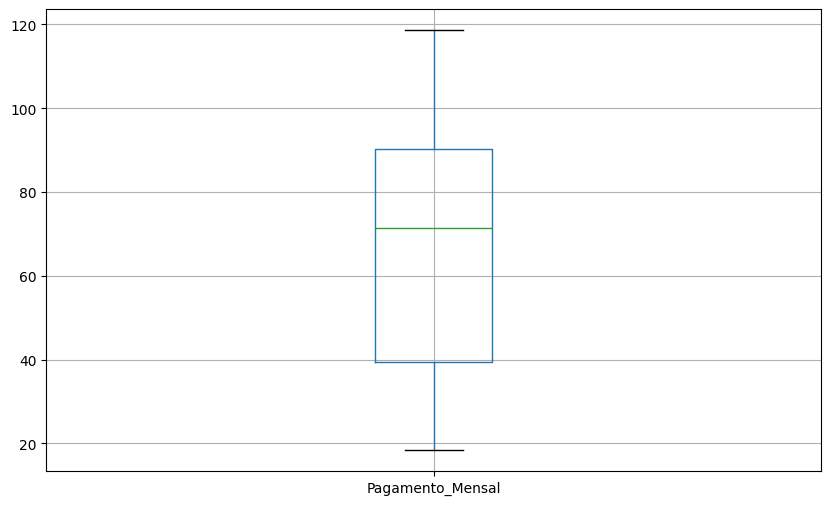

In [10]:
# Verificando dados de Pagamento_Mensal
plt.figure(figsize=(10,6))
df.boxplot(column='Pagamento_Mensal')

In [11]:
media_pag = df['Pagamento_Mensal'].mean()
mediana_pag = df['Pagamento_Mensal'].median()
moda_pag = df['Pagamento_Mensal'].mode()
print("Média", round(media_pag, 2), " | ", "Mediana:", round(mediana_pag, 2), " | ", "Moda:", round(moda_pag, 2))

Média 65.61  |  Mediana: 71.45  |  Moda: 0    20.05
Name: Pagamento_Mensal, dtype: float64


In [12]:
# Tratamento de dados nulos para a coluna 'Pagamento_Mensal'
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].mean())

In [13]:
df.isnull().mean()*100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal       0.000000
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

## Análise e Tratamento de Nulos para a Coluna 'PhoneService'
Agora, a única coluna que possui dados nulos é a coluna de PhoneService, que é a informação se o cliente contratou serviço telefônico na empresa, ou seja, um dado booleano (Sim ou Não). <br> Como essa coluna possui uma porcentagem muito grande de dados nulos, se eu substituir por um dos lados (sim ou não) vai levar a um vies muito maior para um desses lados, o que eu não tenho certeza. Dessa forma, a maneira que irá preservar essa quantidade de dados e evitar o viés, sendo mais possível de interpretar, é adicionar uma terceira opção: Indefinido. 

In [14]:
df[df['PhoneService'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
161,0867-MKZVY,Female,0,Yes,No,20,NaN,Fiber optic,Yes,No,No,Month-to-month,Electronic check,65.607563,1592.35,Yes
162,4482-EWFMI,Female,0,No,No,2,NaN,Fiber optic,No,No,No,Month-to-month,Electronic check,65.607563,135.20,No
163,4648-YPBTM,Male,0,No,No,53,NaN,DSL,No,Yes,No,Two year,Bank transfer (automatic),65.607563,3958.25,No
164,2907-ILJBN,Female,0,Yes,Yes,11,NaN,No,No internet service,No internet service,No internet service,One year,Mailed check,65.607563,233.90,No
165,6345-FZOQH,Male,0,Yes,No,69,NaN,No,No internet service,No internet service,No internet service,Two year,Mailed check,65.607563,1363.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,8883-ANODQ,Female,0,Yes,Yes,68,NaN,Fiber optic,No,No,No,Two year,Credit card (automatic),84.400000,5746.75,No
1639,4690-LLKUA,Male,1,No,No,17,NaN,DSL,No,No,No,Month-to-month,Electronic check,45.050000,770.60,Yes
1640,2351-RRBUE,Female,0,Yes,Yes,7,NaN,No,No internet service,No internet service,No internet service,One year,Mailed check,20.650000,134.05,No
1641,5980-BDHPY,Male,0,Yes,No,72,NaN,DSL,Yes,Yes,Yes,Two year,Bank transfer (automatic),87.100000,6230.10,No


In [15]:
# Tratamento de nulos da coluna 'PhoneService'
df['PhoneService'] = df['PhoneService'].fillna('Indefinido')

In [16]:
df.isnull().mean()*100

customerID            0.0
Genero                0.0
Idoso                 0.0
Casado                0.0
Dependents            0.0
Tempo_como_Cliente    0.0
PhoneService          0.0
Servico_Internet      0.0
Servico_Seguranca     0.0
Suporte_Tecnico       0.0
StreamingTV           0.0
Tipo_Contrato         0.0
PaymentMethod         0.0
Pagamento_Mensal      0.0
Total_Pago            0.0
Churn                 0.0
dtype: float64

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou, até mesmo, valores escritos de forma dirente e corrija.

In [17]:
# Verificando valores únicos de cada coluna do dataframe
for col in df.columns:
    print("Coluna: {}".format(col))
    print(df[col].unique())

Coluna: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']
Coluna: Genero
['Female' 'Male' 'F' 'M' 'f']
Coluna: Idoso
[0 1]
Coluna: Casado
['Yes' 'No']
Coluna: Dependents
['No' 'Yes']
Coluna: Tempo_como_Cliente
[ 1 34  2 45 52 71 10 21 12 58 49 30 47 72 17 27  5 46 11 70 63 13 69 43
 15 25  8 60 18 66  9  3 31 50 64 62 56  7 42 35 48 29 65 38 68 32 55 37
 36 41  6  4 33 67 23 57 61 14 22 16 20 53 40 59 24 44 19 54 51 28 26  0
 39]
Coluna: PhoneService
['No' 'Yes' 'Indefinido']
Coluna: Servico_Internet
['DSL' 'No' 'Fiber optic' 'dsl']
Coluna: Servico_Seguranca
['No' 'Yes' 'No internet service']
Coluna: Suporte_Tecnico
['No' 'Yes' 'No internet service']
Coluna: StreamingTV
['No' 'No internet service' 'Yes']
Coluna: Tipo_Contrato
['Month-to-month' 'One year' 'Two year']
Coluna: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Coluna: Pagamento_Mensal
[ 29.85  56.95  53.85 ...  98.4  100.7 

### Análise de Padronização
**Colunas que precisarão de padronização nos dados**: <br> 
> Genero: Precisará de padronização para Female F ou f, e Male para M ou m.

In [18]:
# Tratamento de padronização dos dados da coluna 'Genero'
substituicao = {  
    'F': 'Female',  
    'M': 'Male', 
    'f': 'Female'
}

df['Genero'] = df['Genero'].replace(substituicao)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [19]:
df.columns

Index(['customerID', 'Genero', 'Idoso', 'Casado', 'Dependents',
       'Tempo_como_Cliente', 'PhoneService', 'Servico_Internet',
       'Servico_Seguranca', 'Suporte_Tecnico', 'StreamingTV', 'Tipo_Contrato',
       'PaymentMethod', 'Pagamento_Mensal', 'Total_Pago', 'Churn'],
      dtype='object')

In [20]:
nome_cols = {
    'customerID': 'ID',  
    'Dependents': 'Dependentes',
    'PhoneService': 'Servico_Telefonico', 
    'StreamingTV': 'Streaming_TV', 
    'PaymentMethod': 'Metodo_Pagamento'
}
df = df.rename(columns=nome_cols)

In [21]:
df.head()

,ID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.950000,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),65.607563,1840.75,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,65.607563,1022.95,No


# Download de Dados Pré-Processados

In [22]:
df.to_csv('Churn_Telecon_Pre_Processado.csv', index=False)

In [23]:
df_churn = pd.read_csv('Churn_Telecon_Pre_Processado.csv')
df_churn.head()

,ID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.950000,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),65.607563,1840.75,No
4,8191-XWSZG,Female,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,65.607563,1022.95,No
